In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc
import seaborn as sns

Задание №1. Проведите корреляционный анализ данных из файла 'ex1.csv' по Пирсону

In [36]:
# считывание файла
df1 = pd.read_csv('ex1.csv')

df1.head()

,x,y
0,40.221367,28.074933
1,41.383916,105.179581
2,50.157355,162.764514
3,20.647573,-51.647274
4,50.657121,126.580772


x    float64
y    float64
dtype: object


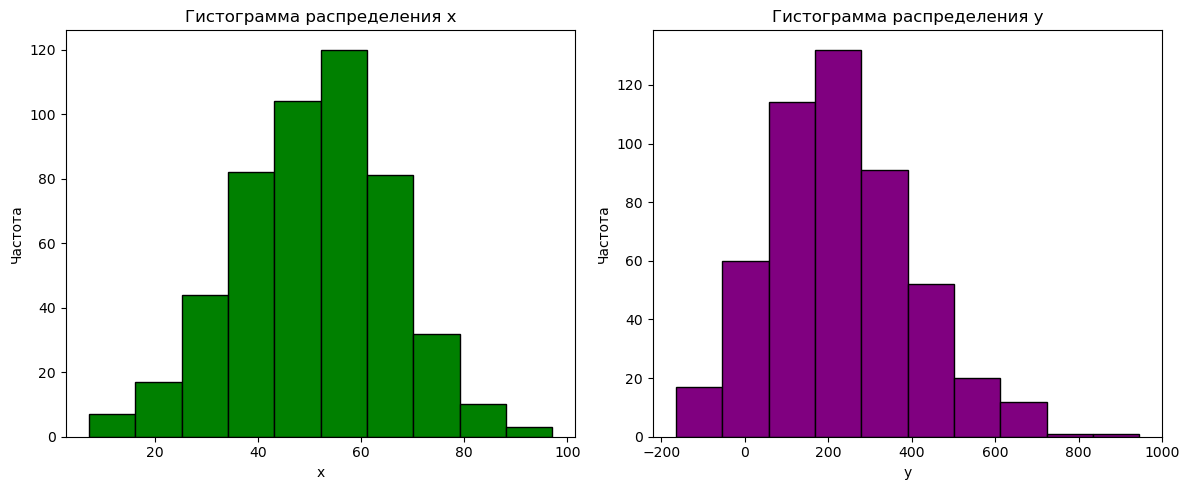

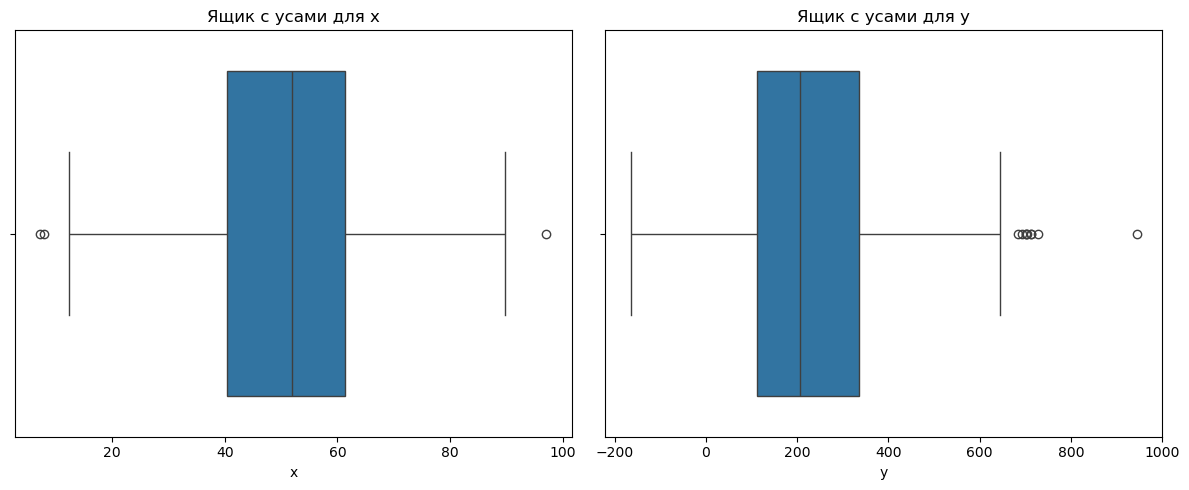

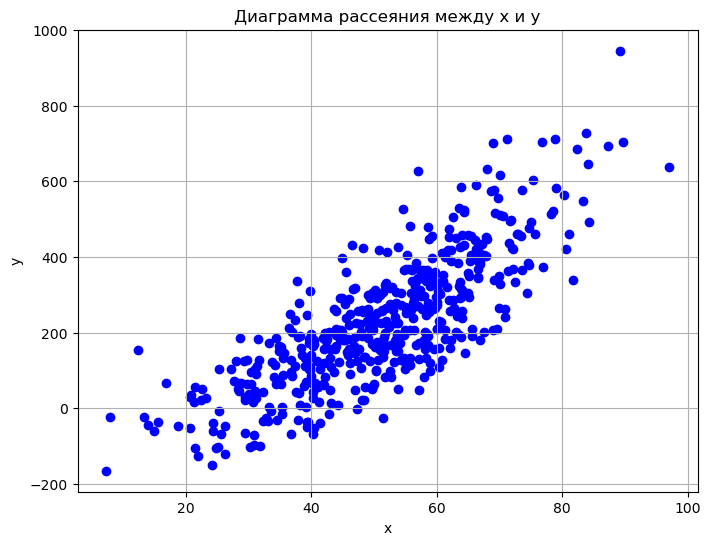

Целесообразно использовать корреляцию Пирсона, так как графики показывают наличие линейной зависимости между x и y


,x,y
x,1.000000,0.803232
y,0.803232,1.000000


In [37]:
# КРИТЕРИЙ 1

# проверка, что все элементы - численного типа
print(df1.dtypes)

# построение гистограмм распределения
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(df1['x'], bins=10, color='green', edgecolor='black')
plt.title('Гистограмма распределения x')
plt.xlabel('x')
plt.ylabel('Частота')

plt.subplot(1, 2, 2)
plt.hist(df1['y'], bins=10, color='purple', edgecolor='black')
plt.title('Гистограмма распределения y')
plt.xlabel('y')
plt.ylabel('Частота')

plt.tight_layout()
plt.show()
# построение "ящика с усами" для изучения выбросов
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x=df1['x'])
plt.title('Ящик с усами для x')

plt.subplot(1, 2, 2)
sns.boxplot(x=df1['y'])
plt.title('Ящик с усами для y')

plt.tight_layout()
plt.show()
# построение диаграммы рассеяния
plt.figure(figsize=(8, 6))
plt.scatter(df1['x'], df1['y'], color='blue')
plt.title('Диаграмма рассеяния между x и y')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()

# вывод о целесообразности использования корреляции Пирсона с обоснованием на основе предшествующих графиков
correlation = df1.corr(method='pearson')

if abs(correlation.loc['x', 'y']) > 0.5:
    print("Целесообразно использовать корреляцию Пирсона, так как графики показывают наличие линейной зависимости между x и y")
else:
    print("Корреляция Пирсона может быть нецелесообразна из-за слабой линейной зависимости между x и y")
correlation

In [38]:
# КРИТЕРИЙ 2

# расчет коэффициента Пирсона
correlation_coefficient, p_value = sc.stats.pearsonr(df1['x'], df1['y'])
print(f"Коэффициент корреляции Пирсона: {correlation_coefficient}")
print(f"p-значение: {p_value}")

# расчет t-критерия
t_statistic = correlation_coefficient * np.sqrt((len(df1['x']) - 2) / (1 - correlation_coefficient**2))
print(f"t-статистика: {t_statistic}")
# вывод о степени корреляции величин и статистической значимости их взаимосвязи
alpha = 0.05
if p_value < alpha:
    print("Отвергаем нулевую гипотезу: корреляция статистически значима")
else:
    print("Принимаем нулевую гипотезу: корреляция не статистически значима")

if abs(correlation_coefficient) < 0.3:
    correlation_strength = "Слабая"
elif abs(correlation_coefficient) < 0.7:
    correlation_strength = "Умеренная"
else:
    correlation_strength = "Сильная"

print(f"Степень корреляции: {correlation_strength} ({correlation_coefficient})")

Коэффициент корреляции Пирсона: 0.8032321850936792
p-значение: 3.9738590563692845e-114
t-статистика: 30.092129139493757
Отвергаем нулевую гипотезу: корреляция статистически значима
Степень корреляции: Сильная (0.8032321850936792)


Задание №2. Проведите корреляционный анализ данных из файла 'ex2.csv' по Спирмену

In [39]:
# считывание файла
df2 = pd.read_csv('ex2.csv')

x    float64
y    float64
dtype: object


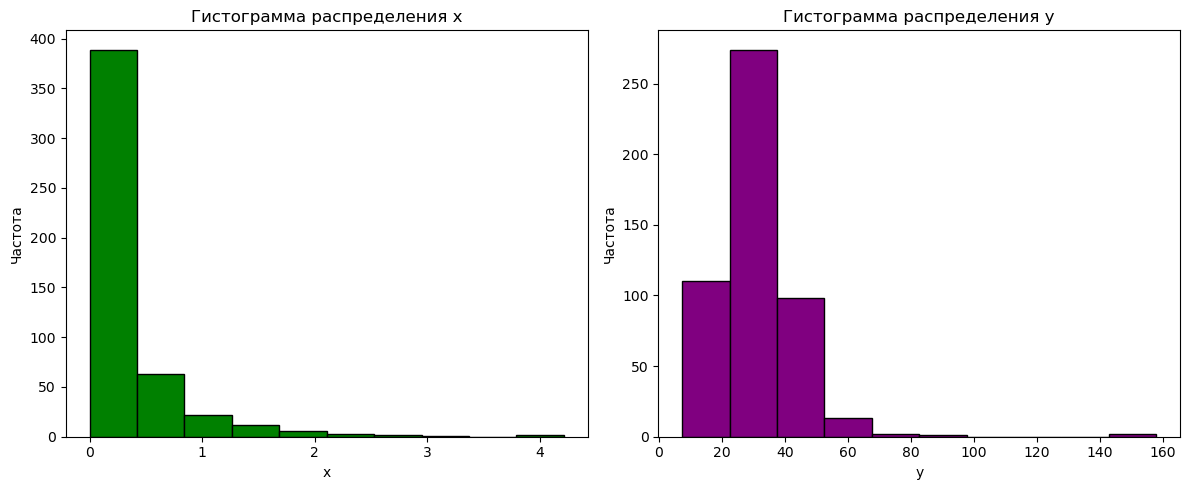

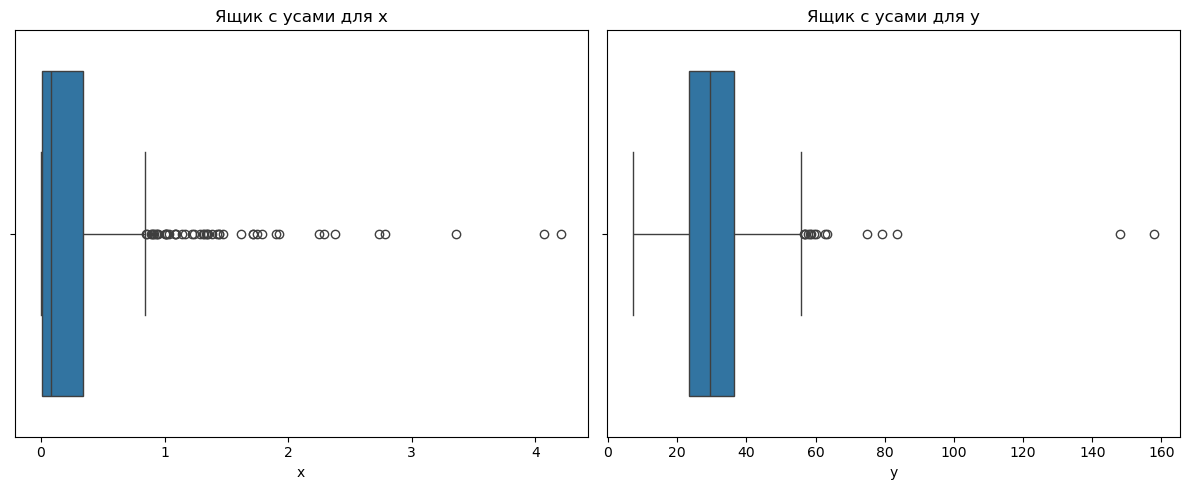

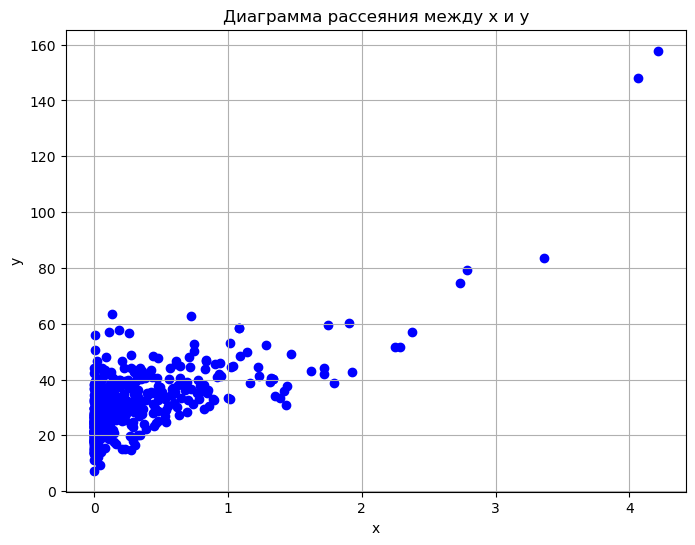

Делаем вывод о том, что использовать корреляцию Спирмена будет более уместно, так как данные нормально не распределены, содержат выбросы


In [40]:
# КРИТЕРИЙ 3

# проверка, что все элементы - численного типа
print(df2.dtypes)

# построение гистограмм распределения

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(df2['x'], bins=10, color='green', edgecolor='black')
plt.title('Гистограмма распределения x')
plt.xlabel('x')
plt.ylabel('Частота')

plt.subplot(1, 2, 2)
plt.hist(df2['y'], bins=10, color='purple', edgecolor='black')
plt.title('Гистограмма распределения y')
plt.xlabel('y')
plt.ylabel('Частота')

plt.tight_layout()
plt.show()
# построение "ящика с усами" для изучения выбросов
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x=df2['x'])
plt.title('Ящик с усами для x')

plt.subplot(1, 2, 2)
sns.boxplot(x=df2['y'])
plt.title('Ящик с усами для y')

plt.tight_layout()
plt.show()

# построение диаграммы рассеяния

plt.figure(figsize=(8, 6))
plt.scatter(df2['x'], df2['y'], color='blue')
plt.title('Диаграмма рассеяния между x и y')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()

# вывод о целесообразности использования корреляции Спирмена с обоснованием на основе предшествующих графиков
print('Делаем вывод о том, что использовать корреляцию Спирмена будет более уместно, так как данные нормально не распределены, содержат выбросы')

In [41]:
# КРИТЕРИЙ 4

# расчет коэффициента Спирмена

spearman_coefficient, p_value = sc.stats.spearmanr(df2['x'], df2['y'])
print(f"Коэффициент корреляции Спирмена: {spearman_coefficient}")
print(f"p-значение: {p_value}")

# расчет t-критерия
t_statistic = spearman_coefficient * np.sqrt((len(df2['x']) - 2) / (1 - spearman_coefficient**2))
print(f"t-статистика: {t_statistic}")
# вывод о степени корреляции величин и статистической значимости их взаимосвязи
alpha = 0.05
if p_value < alpha:
  print("Отвергаем нулевую гипотезу: корреляция статистически значима")
else:
    print("Принимаем нулевую гипотезу: корреляция не статистически значима")

if abs(spearman_coefficient) < 0.3:
    correlation_strength = "Слабая"
elif abs(spearman_coefficient) < 0.7:
    correlation_strength = "Умеренная"
else:
    correlation_strength = "Сильная"

print(f"Степень корреляции: {correlation_strength} ({spearman_coefficient})")


Коэффициент корреляции Спирмена: 0.6170866283465134
p-значение: 8.471901488365329e-54
t-статистика: 17.50023569782885
Отвергаем нулевую гипотезу: корреляция статистически значима
Степень корреляции: Умеренная (0.6170866283465134)


Задание №3. Проведите линейный регрессионный анализ данных из файла 'ex3.csv'

In [42]:
# считывание файла
df3 = pd.read_csv('ex3.csv')

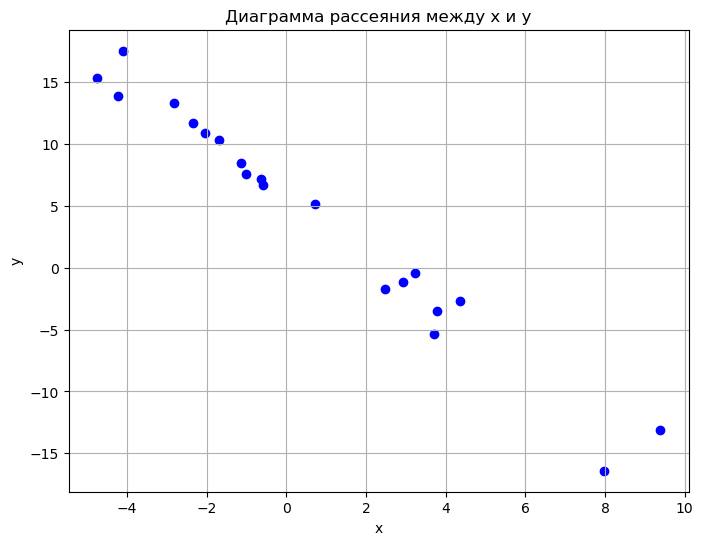

Коэффициент корреляции Пирсона: -0.9851417834585036
p-значение: 3.1764533567697226e-15
Степень корреляции: Сильная (-0.9851417834585036)
Корреляция Пирсона подходит для анализа линейной зависимости между переменными


In [60]:
# КРИТЕРИЙ 5

# построение диаграммы рассеяния
plt.figure(figsize=(8, 6))
plt.scatter(df3['x'], df3['y'], color='blue')
plt.title('Диаграмма рассеяния между x и y')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()
# расчет коэффициента Пирсона
pearson_coefficient, p_value = sc.stats.pearsonr(df3['x'], df3['y'])
print(f"Коэффициент корреляции Пирсона: {pearson_coefficient}")
print(f"p-значение: {p_value}")


# вывод о целесообразности использования корреляции Пирсона

if abs(pearson_coefficient) < 0.3:
    correlation_strength = "Слабая"
elif abs(pearson_coefficient) < 0.7:
    correlation_strength = "Умеренная"
else:
    correlation_strength = "Сильная"

print(f"Степень корреляции: {correlation_strength} ({pearson_coefficient})")
print("Корреляция Пирсона подходит для анализа линейной зависимости между переменными")

Коэффициенты модели линейной регрессии: 5.740762449346207, x: -2.339135741114135


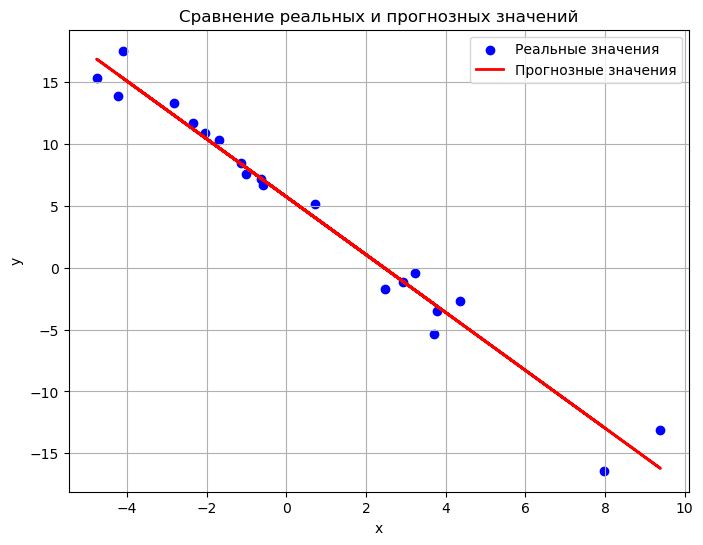

In [65]:
# КРИТЕРИЙ 6

# расчет коэффициентов линейной регрессии
import statsmodels.api as sm
X = sm.add_constant(df3['x'])
model = sm.OLS(df3['y'], X).fit()
print(f'Коэффициенты модели линейной регрессии: {model.params.iloc[0]}, x: {model.params.iloc[1]}')

# построение диаграммы рассеяния прогнозных и реальных значений на одном графике
plt.figure(figsize=(8, 6))
plt.scatter(df3['x'], df3['y'], color='blue', label='Реальные значения')
plt.plot(df3['x'], model.predict(X), color='red', label='Прогнозные значения', linewidth=2)
plt.title('Сравнение реальных и прогнозных значений')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()

In [66]:
# КРИТЕРИЙ 7

# расчет средней ошибки аппроксимации
MEA = np.mean(abs((df3['y'] - model.predict(X))/df3['y']))*100
print(f"Средняя ошибка аппроксимации (MEA): {MEA}")

Средняя ошибка аппроксимации (MEA): 35.26380487772689


In [69]:
# КРИТЕРИЙ 8

# расчет F-критерия
f_statistic = model.fvalue
f_p_value = model.f_pvalue
print(f"F-статистика: {f_statistic}")
print(f"p-значение для F-критерия: {f_p_value}")

# вывод о статистической значимости уравнения в целом
if f_p_value < 0.05:
    print("Уравнение лин регрессии статистически значимо")
else:
    print("Уравнение лин регрессии не статистически значимо")

F-статистика: 592.2591378853078
p-значение для F-критерия: 3.176453356769865e-15
Уравнение лин регрессии статистически значимо


In [73]:
# КРИТЕРИЙ 9

# расчет стандартных ошибок коэффициентов регрессии и коэффициента корреляции
print(f"Стандартные ошибки коэффициентов - '{model.bse.index[0]}' : {model.bse.iloc[0]}, '{model.bse.index[1]}' : {model.bse.iloc[1]}")
print(f"Коэффициент корреляция: {sc.stats.pearsonr(df3['x'], df3['y'])[0]}")

# расчет t-критерия коэффициентов регрессии и коэффициента корреляции
t_coef = abs(sc.stats.t.ppf(alpha/2, len(df3['x'])-2))
t_real = abs(sc.stats.t.ppf(model.pvalues/2, len(df3['x'])-2))[1]

print(f'Расчетное значение t-критерия: {t_real}')
print(f'Критическое значение t-критерия: {t_coef}')
# вывод о статистической значимости коэффициентов регрессии
print('Между признаком x и критерием y существует отрицательная линейная связь')
# запись диапазона коэффицентов регрессии
print(f"95% доверительный интервал для '{model.bse.index[0]}': {model.params.iloc[0]} +/- {t_coef*model.bse.iloc[0]}")
print(f"95% доверительный интервал для '{model.bse.index[1]}': {model.params.iloc[1]} +/- {t_coef*model.bse.iloc[1]}")


Стандартные ошибки коэффициентов - 'const' : 0.3755103704947333, 'x' : 0.09611685229891032
Коэффициент корреляция: -0.9851417834585036
Расчетное значение t-критерия: 24.336374789300645
Критическое значение t-критерия: 2.10092204024096
Между признаком x и критерием y существует отрицательная линейная связь
95% доверительный интервал для 'const': 5.740762449346207 +/- 0.7889180137114339
95% доверительный интервал для 'x': -2.339135741114135 +/- 0.20193401343336567


In [74]:
# КРИТЕРИЙ 10

# Дать предсказание в виде интервальной оценки для y при x0 = 6
x0 = 6
predicted_value = model.predict(np.array([1, x0]))
predicted_interval = model.get_prediction(np.array([1, x0])).summary_frame(alpha=0.05)
print(f"Предсказанное значение y при x0 = {x0}: {predicted_value[0]}")
print(f"95% доверительный интервал для предсказанного значения: {predicted_interval.loc[0, 'obs_ci_lower'], predicted_interval.loc[0, 'obs_ci_upper']}")

Предсказанное значение y при x0 = 6: -8.294051997338604
95% доверительный интервал для предсказанного значения: (-12.01686371210996, -4.571240282567249)


Задание №4. Проведите линейный регрессионный анализ данных из файла 'ex4.csv'

In [76]:
# считывание файла
df4 = pd.read_csv('ex4.csv')
df4

,x1,x2,y
0,13.637973,12.069977,-9.893143
1,-6.443507,23.970769,137.003862
2,9.361274,14.760979,20.571415
3,1.619709,24.043092,93.407384
4,-1.050608,21.837863,95.041511
5,9.395217,21.831347,41.765421
6,0.688195,10.526957,42.816414
7,-2.805982,25.806484,120.682713
8,9.942228,24.724110,52.673352
9,7.774614,19.247490,43.682796


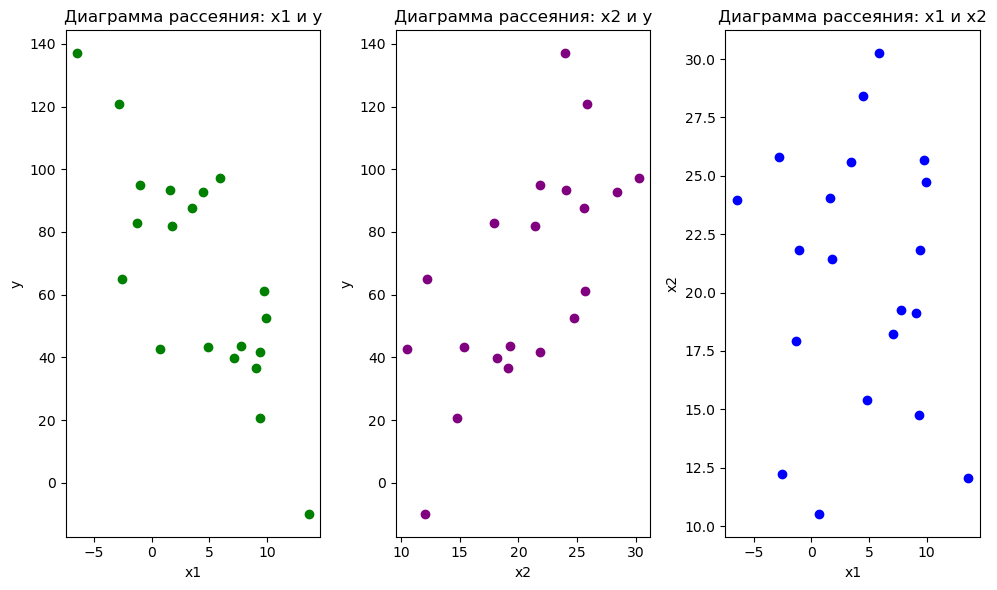

          x1        x2         y
x1  1.000000 -0.075013 -0.787807
x2 -0.075013  1.000000  0.669834
y  -0.787807  0.669834  1.000000
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     1993.
Date:                Sun, 22 Dec 2024   Prob (F-statistic):           6.90e-21
Time:                        03:19:56   Log-Likelihood:                -44.683
No. Observations:                  20   AIC:                             95.37
Df Residuals:                      17   BIC:                             98.35
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]

In [83]:
# КРИТЕРИЙ 11

# построение диаграмм рассеяния (x1/y, x2/y, x1/x2)
plt.figure(figsize=(10, 6))
plt.subplot(1, 3, 1)
plt.scatter(df4['x1'], df4['y'], color='green')
plt.title('Диаграмма рассеяния: x1 и y')
plt.xlabel('x1')
plt.ylabel('y')

plt.subplot(1, 3, 2)
plt.scatter(df4['x2'], df4['y'], color='purple')
plt.title('Диаграмма рассеяния: x2 и y')
plt.xlabel('x2')
plt.ylabel('y')

plt.subplot(1, 3, 3)
plt.scatter(df4['x1'], df4['x2'], color='blue')
plt.title('Диаграмма рассеяния: x1 и x2')
plt.xlabel('x1')
plt.ylabel('x2')


plt.tight_layout()
plt.show()


# расчет коэффициентов корреляции
correlation_matrix = df4.corr()
print(correlation_matrix)
X = df4[['x1', 'x2']]
X = sm.add_constant(X)
y = df4['y']

model = sm.OLS(y, X).fit()

model_summary = model.summary()
print(model_summary)

# вывод о корректности использования модели множественной регрессии
print('Так как отсутствует мультиколлинеарность, модель применима')
# вывод о необходимости устранения какого-либо фактора
print('Так как отсутствует мультиколлинеарность, отсутстствует необходимость исключать какой-либо фактор')


In [85]:
# КРИТЕРИЙ 12

# расчет стандартных коэффицентов регрессии
X = df4[['x1', 'x2']]
y = df4['y']

X_std = (X - X.mean()) / X.std()
y_std = (y - y.mean()) / y.std()

model_standardized = sm.OLS(y_std, X_std).fit()
standardized_coefficients = model_standardized.params
print(f"Коэффициенты стандартной регрессии - '{model_standardized.params.index[0]}' : {model_standardized.params.iloc[0]}, '{model_standardized.params.index[1]}' : {model_standardized.params.iloc[1]}")

Коэффициенты стандартной регрессии - 'x1' : -0.7417345957390165, 'x2' : 0.6141944304545282


Коэффициенты чистой регрессии - 'const' : 6.72207635954684, 'x1' : -4.917384791357819, 'x2' : 3.8926845815394917


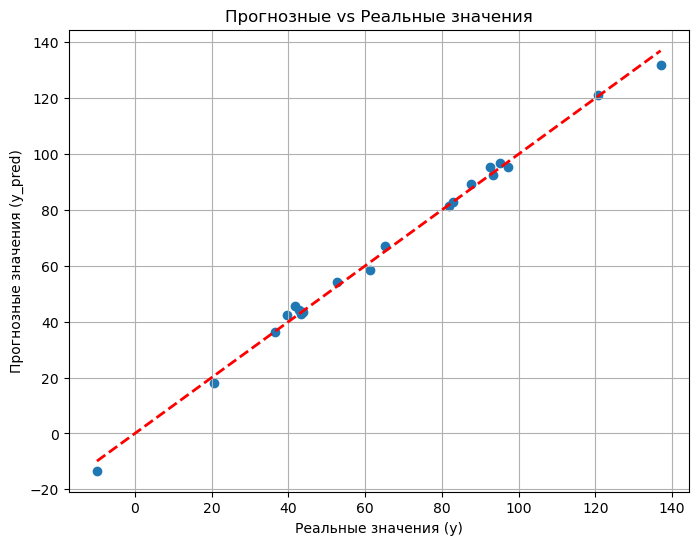

In [89]:
# КРИТЕРИЙ 13

# расчет коэффициентов "чистой" регрессии
X = df4[['x1', 'x2']]
y = df4['y']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(f"Коэффициенты чистой регрессии - '{model.params.index[0]}' : {model.params.iloc[0]}, '{model.params.index[1]}' : {model.params.iloc[1]}, '{model.params.index[2]}' : {model.params.iloc[2]}")

# построение диаграмм рассеяния прогнозных и реальных значений на одном графике
model = sm.OLS(y, X).fit()

y_pred = model.predict(X)

plt.figure(figsize=(8, 6))
plt.scatter(y, y_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.title('Прогнозные vs Реальные значения')
plt.xlabel('Реальные значения (y)')
plt.ylabel('Прогнозные значения (y_pred)')
plt.grid()
plt.show()


In [92]:
# КРИТЕРИЙ 14

# расчет индекса множественной корреляции
r_sqr = model.rsquared
corr_index = r_sqr ** 0.5

print("Индекс множественной корреляции (R):", corr_index)

# расчет F-критерия
f_statistic = model.fvalue
print(f"F-критерий: {f_statistic}")

# вывод о статистической значимости уравнения в целом
print('Учитывая высокие коэффициенты R и F-критерия, имеется значимость уравнения в целом')

Индекс множественной корреляции (R): 0.9978740120183569
F-критерий: 1992.6978283137187
Учитывая высокие коэффициенты R и F-критерия, имеется значимость уравнения в целом


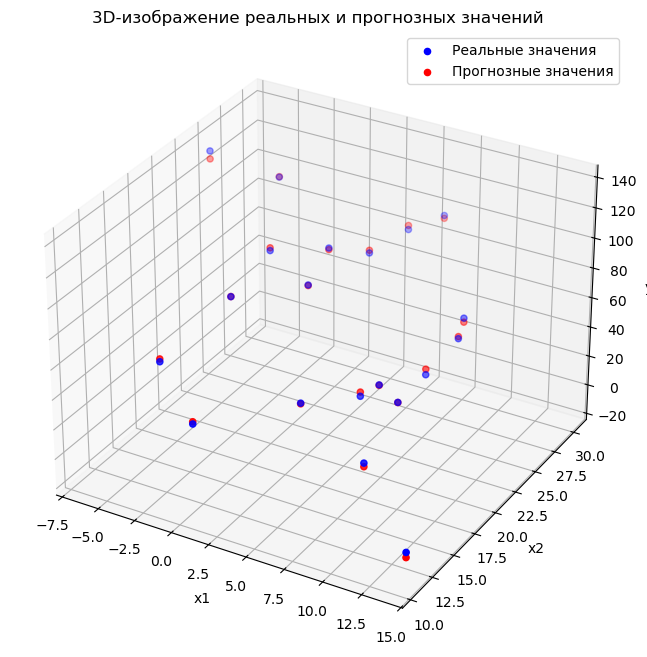

In [96]:
# КРИТЕРИЙ 15

# построение 3D-изображения прогнозных и реальных значений на одном графике
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df4['x1'], df4['x2'], df4['y'], color='b', label='Реальные значения')

ax.scatter(df4['x1'], df4['x2'], y_pred, color='r', label='Прогнозные значения')

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')
ax.legend()
plt.title('3D-изображение реальных и прогнозных значений')
plt.show()